# imports

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from collections import Counter
import re
import os
import sys

# utilities

In [295]:
def countLetters(file):
    with open(file,encoding='utf-8') as f:
        c = Counter()
        for line in f:
            toLower = line.lower()
            regex = re.compile('[^a-z]')
            toLower = regex.sub('', toLower)
            c += Counter(toLower.strip())
    toRet = pd.DataFrame.from_dict(c, orient='index')
    toRet.columns = ['count']
    toRet = toRet.sort_index()
    toRet = toRet.fillna(0)
    return toRet
def countLettersInLine(line):
    toLower = line.lower()
    regex = re.compile('[^a-z]')
    toLower = regex.sub('', toLower)
    c = Counter(toLower.strip())
    toRet = countLetters("demo.txt")
    toRet['count'] = 0
    
    temp = pd.DataFrame.from_dict(c, orient='index')
    temp.columns = ['toDelete']
    temp = temp.sort_index()
    toRet = pd.concat([toRet,temp],axis=1)
    toRet = toRet.sort_index()
    toRet = toRet.fillna(0)
    toRet = toRet.drop(columns=['count'])
    return toRet

PTHSPLITTER = "\\"

In [400]:
class Perceptron:
    def __init__(self, language, theta=0, alpha=0.1, beta=0.1):
        self.language = language
        self.W = countLetters("demo.txt")
        self.W['count'] = np.random.uniform(-1,1,len(self.W['count']))
        self.theta = theta
        self.alpha = alpha
        self.beta = beta

    def calcLinear(self,X):
            return np.dot(self.W['count'],X)

    def discreteOut(self,X):
            return 1 if self.calcLinear(X) >= self.theta else 0
        
    def test_all(self,dir):
            truePositives = 0
            trueNegatives = 0
            falsePositives = 0
            falseNegatives = 0

            X = countLetters('demo.txt')
            X['count'] = 0

            for root, dirs, files in os.walk(dir):
                answer = 1 if root.split(PTHSPLITTER)[-1] == self.language else 0
                for file in files:
                    X['count'] = countLetters(os.path.join(root,file))['count']
                    X = X.fillna(0)
                    if self.discreteOut(X['count']) == answer:
                        if answer == 1:
                            truePositives += 1
                        else:
                            falseNegatives += 1
                    else:
                        if answer == 1:
                            falsePositives += 1
                        else:
                            trueNegatives += 1
            return {"truePositives": truePositives, "trueNegatives": trueNegatives, "falsePositives": falsePositives, "falseNegatives": falseNegatives}

    def train(self,dir,epochs):
            guess = 0
            answer = 0
            
            X = countLetters('demo.txt')
            X['count'] = 0
            

            for i in range(epochs):
                for root, dirs, files in os.walk(dir):
                        if root != 'langs\\' + self.language:
                            continue
                        for file in files:
                            answer = 1 if root.split(PTHSPLITTER)[-1] == self.language else 0
                            X['count'] = countLetters(os.path.join(root,file))['count']
                            X = X.fillna(0)
                            guess = self.discreteOut(X['count'])
                            if guess != answer:
                                self.W['count'] += self.alpha * (answer - guess) * X['count']
                                self.theta -= self.beta * (answer - guess)
                                #normalize W
                        self.W['count'] = (self.W['count'] - self.W['count'].mean()) / self.W['count'].std()

    def guessLinear(self,lang):
        X = countLetters('demo.txt')
        X['count'] = 0
        X['count'] = countLetters(lang)['count']
        X = X.fillna(0)
        return self.calcLinear(X['count'])
    def printProperties(self):
            print("Language: " + self.language)
            print("Theta: " + str(self.theta))
            print("Alpha: " + str(self.alpha))
            print("Beta: " + str(self.beta))
            print("Weights: " + str(self.W['count']))


# properties

In [401]:
theta = 0
alpha = 0.01
beta = 0.001
epochs = 500


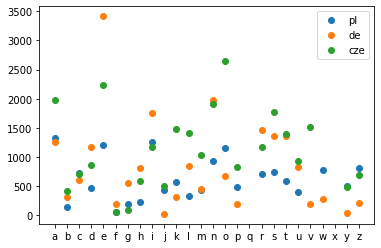

In [402]:
def plotForLang(lang,langsDir):
    X = countLetters("demo.txt")
    X['count'] = 0
    for root,dirs,files in os.walk(langsDir):
        if root.split('\\')[-1] == lang:
            for file in files:
                counted = countLetters('langs/'+ lang + "/" + file)
                X['count'] = X['count'] + counted['count']
    mpl.plot(X,'o')

plotForLang('pl','langs')
plotForLang('de','langs')
plotForLang('cze','langs')

mpl.legend(['pl','de','cze'])
mpl.show()



# perceptron training

Language: cze
Theta: -0.001
Alpha: 0.01
Beta: 0.001
Weights: a    1.714764
b   -1.284046
c   -0.007149
d    0.371613
e    1.175257
f   -0.594352
g   -0.508114
h   -0.092980
i   -0.054350
j   -0.548639
k    1.383796
l   -0.376126
m    0.737712
n    0.902255
o    2.129613
p   -0.933248
q   -1.321431
r    0.204063
s    0.999610
t   -0.052582
u   -0.948592
v    0.868360
w   -1.789889
x   -0.713349
y   -0.319871
z   -0.942326
Name: count, dtype: float64
Language: de
Theta: -0.001
Alpha: 0.01
Beta: 0.001
Weights: a    0.203431
b    0.059005
c    0.432914
d   -0.531757
e    2.107274
f   -1.379371
g    0.674743
h    1.206126
i    1.490298
j   -1.557721
k   -1.495556
l   -0.349599
m   -0.086638
n    1.488164
o   -0.832039
p   -0.961186
q   -0.161407
r    0.059931
s    1.528714
t   -0.007448
u   -0.383644
v   -1.649593
w    0.196898
x    0.088603
y    0.148482
z   -0.288624
Name: count, dtype: float64
Language: pl
Theta: -0.001
Alpha: 0.01
Beta: 0.001
Weights: a    1.538904
b   -0.067631
c    1.

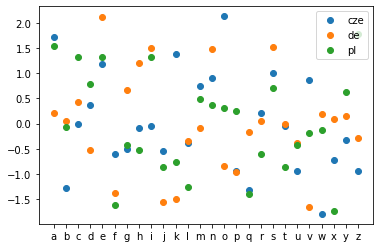

In [403]:
perceptronList = []
for root, dirs, files in os.walk('langs'):
    for dir in dirs:
        perceptronList.append(Perceptron(dir,theta,alpha,beta))
for Perc in perceptronList:
    Perc.train('langs',epochs)
    Perc.printProperties()
    mpl.plot(Perc.W,'o')
mpl.legend([perceptronList[0].language,perceptronList[1].language,perceptronList[2].language])
mpl.show()

# test

In [404]:
for perceptron in perceptronList:
    print(perceptron.language + ": " + str(perceptron.test_all('langs')))

cze: {'truePositives': 7, 'trueNegatives': 10, 'falsePositives': 0, 'falseNegatives': 0}
de: {'truePositives': 5, 'trueNegatives': 12, 'falsePositives': 0, 'falseNegatives': 0}
pl: {'truePositives': 5, 'trueNegatives': 12, 'falsePositives': 0, 'falseNegatives': 0}


# guess

In [411]:
p_guess = dict()
for perceptron in perceptronList:
    p_guess[perceptron.language] = perceptron.guessLinear("pasteFile.txt")

print(p_guess)
print(max(p_guess, key=p_guess.get))

{'cze': 2442.814035798423, 'de': 674.7568588720575, 'pl': 1227.8240954284063}
cze
